# Neural Network Spotify Playlist


### Data Pre-Processing

Prepare the data for the neural network. This includes splitting the data into a training and testing dataset, Scaling the data, and encoding the categorical target values

In [44]:
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import panel as pn
pn.extension('plotly')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [45]:
#reading into compiled csv
data = Path("Resources/spotify_main_raw_data.csv")
df = pd.read_csv(data)
df.shape
df.columns

Index(['Unnamed: 0', 'artist', 'track', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature', 'playlist'],
      dtype='object')

In [46]:
#dropping irrelevant columns
raw_data = df.drop(['Unnamed: 0',
                    "track",
                    "type",
                    "id",
                    "uri",
                    "track_href",
                    "analysis_url",
                    "time_signature",
                    "artist",
                    "duration_ms",
                    "liveness",
                    "key",
                    "mode"
                                    ],axis=1)

raw_data.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,playlist
0,0.432,0.0951,-23.511,0.0388,0.909,0.890,0.0930,100.265,Jazz
1,0.643,0.2800,-13.774,0.0332,0.965,0.867,0.0865,108.046,Jazz
2,0.322,0.1520,-16.765,0.0388,0.958,0.899,0.2030,177.730,Jazz
3,0.609,0.1620,-17.650,0.0375,0.917,0.791,0.1230,106.051,Jazz
4,0.509,0.1540,-18.927,0.0410,0.978,0.936,0.2410,121.049,Jazz


In [47]:
audio_features = raw_data.columns.values
audio_features

array(['danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'valence', 'tempo', 'playlist'],
      dtype=object)

TypeError: Neither the `x` nor `y` variable appears to be numeric.

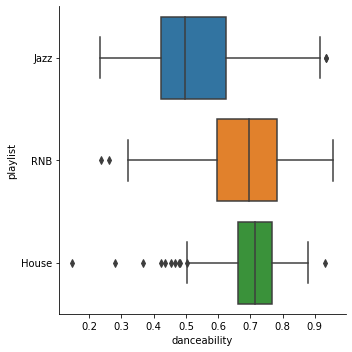

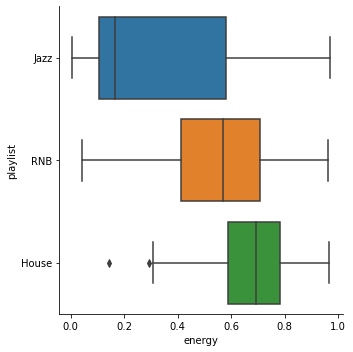

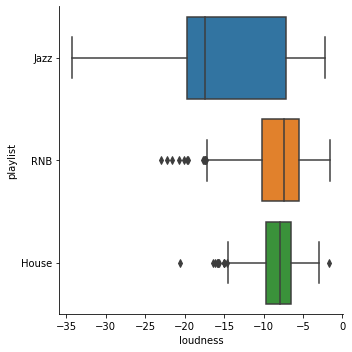

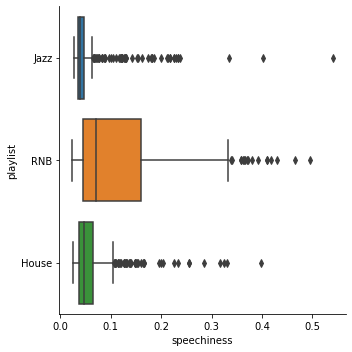

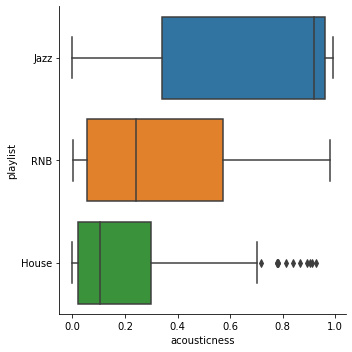

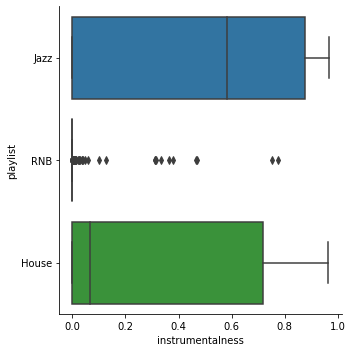

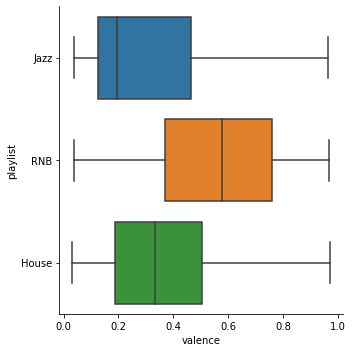

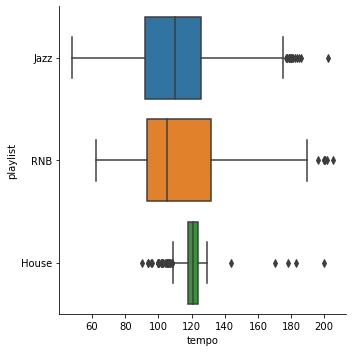

In [48]:
for features in audio_features:
    plot = sns.catplot(x=features, y="playlist", kind="box", data=raw_data)
return plot


In [67]:
#Verifying playlist classifications
raw_data.playlist.value_counts()

RNB      390
House    358
Jazz     334
Name: playlist, dtype: int64

In [68]:
# Define the features X set and the target y vector
X = raw_data.drop("playlist",axis=1)
y = raw_data.loc[:, ["playlist"]]

In [69]:
# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Acknowledge the dimension of both test and training data
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((811, 8), (271, 8), (811, 1), (271, 1))

In [70]:
# Scale the training and testing input features using StandardScaler
X_scaler = StandardScaler()
X_scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [71]:
# Apply One-hot encoding to the target labels
enc = OneHotEncoder()
enc.fit(y_train)

encoded_y_train = enc.transform(y_train).toarray()
encoded_y_test = enc.transform(y_test).toarray()
encoded_y_train[0]

array([0., 1., 0.])

# Build a Deep Neural Network

In [72]:
# Create a sequential model
model = Sequential()

In [73]:
# Add the first layer where the input dimensions are the X.shape[1] = 8 columns of the training data
model.add(Dense(100, activation='relu', input_dim = X.shape[1]))
    
# Add the 2nd layer where the input dimensions are the 12 columns of the training data
model.add(Dense(100, activation='relu', input_dim = 100))

# Add output layer (3 outputs = Rock, Jazz & RNB)
model.add(Dense(3, activation="softmax", input_dim = 100))

In [74]:
# The output layer has 8 columns that are one-hot encoded
y_train.playlist.value_counts()

# 5 output since there're 5 playlists
number_outputs = 3

In [75]:
# Compile the model using categorical_crossentropy for the loss function, the adam optimizer,
# and add accuracy to the training metrics
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [76]:
# Print the model summary
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               900       
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dense_14 (Dense)            (None, 3)                 303       
                                                                 
Total params: 11,303
Trainable params: 11,303
Non-trainable params: 0
_________________________________________________________________


In [77]:
#We call fit(), which will train the model by slicing the data into "batches" of size batch_size, 
#and repeatedly iterating over the entire dataset for a given number of epochs.

# Identifying data dimension
X_train.shape, y_train.shape

((811, 8), (811, 1))

In [78]:
#using 10% of training data as validation data
round(-X_train.shape[0]*0.1)

-81

In [79]:
#ADD VALIDATION DATA
#https://www.tensorflow.org/guide/keras/train_and_evaluate
x_val = X_train_scaled[round(-X_train.shape[0]*0.1):]
y_val = encoded_y_train[round(-X_train.shape[0]*0.1):]
x_train = X_train_scaled[:round(-X_train.shape[0]*0.1)]
y_train = encoded_y_train[:round(-X_train.shape[0]*0.1)]

epochs = 30

print("Fit model on training data")
history = model.fit(
    X_train_scaled,
    encoded_y_train,
    batch_size=64,
    epochs=epochs,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_val, y_val),
)

Fit model on training data
Epoch 1/30
13/13 [==============================] - 0s 7ms/step - loss: 0.9965 - accuracy: 0.5253 - val_loss: 0.8354 - val_accuracy: 0.6667
Epoch 2/30
13/13 [==============================] - 0s 2ms/step - loss: 0.7807 - accuracy: 0.6720 - val_loss: 0.7057 - val_accuracy: 0.7407
Epoch 3/30
13/13 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.7460 - val_loss: 0.6164 - val_accuracy: 0.7778
Epoch 4/30
13/13 [==============================] - 0s 2ms/step - loss: 0.5823 - accuracy: 0.7781 - val_loss: 0.5720 - val_accuracy: 0.8025
Epoch 5/30
13/13 [==============================] - 0s 2ms/step - loss: 0.5351 - accuracy: 0.7953 - val_loss: 0.5518 - val_accuracy: 0.8025
Epoch 6/30
13/13 [==============================] - 0s 2ms/step - loss: 0.5059 - accuracy: 0.8052 - val_loss: 0.5328 - val_accuracy: 0.8025
Epoch 7/30
13/13 [==============================] - 0s 2ms/step - loss: 0.4850 - accuracy: 0.8126 - val_loss: 0.5194 - val_accuracy: 

Calculating the accuracy
Calculating the loss
The results are being visualized


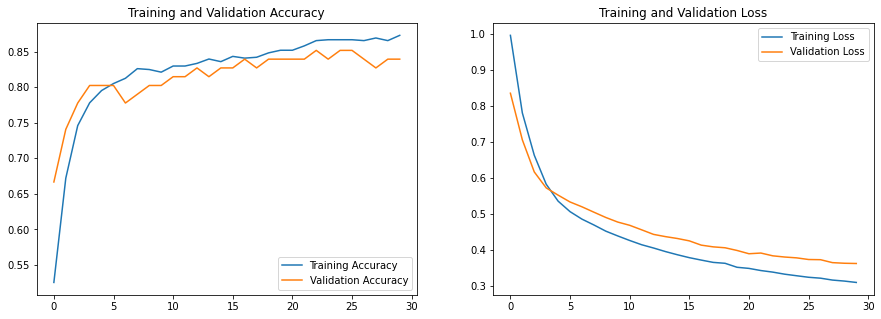

In [80]:

print("Calculating the accuracy")
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
print("Calculating the loss")
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

print("The results are being visualized")
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the Model on Test Data


In [27]:
# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate(X_test_scaled, encoded_y_test, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")


9/9 - 0s - loss: 0.4854 - accuracy: 0.8303 - 15ms/epoch - 2ms/step
Normal Neural Network - Loss: 0.4854082763195038, Accuracy: 0.830258309841156


In [28]:
y_index = y_test.index.values

y_tracks = []

#to identify which track has been selected for y_test
for index in y_index:
    track = df.at[index, "track"]
    y_tracks.append(track)

In [29]:
# Make predictions
predicted = model.predict(X_test_scaled)
predicted = enc.inverse_transform(predicted).flatten().tolist()

# creating a prediction table
results = pd.DataFrame({
    "Index": y_test.index.values,
    "Track": y_tracks,
    "Actual": y_test.playlist.values,
    "Predicted": predicted
})
results.head(10)

,Index,Track,Actual,Predicted
0,776,Out of My Head,House,House
1,699,Les mots d'amour,RNB,House
2,719,Tous mes rêves,RNB,RNB
3,805,No More,House,House
4,135,My Romance,Jazz,Jazz
5,99,You're Good to Me,Jazz,Jazz
6,49,The More I See You,Jazz,Jazz
7,481,All I Need,RNB,RNB
8,913,Tear Me Down (feat. Philip Rustad),House,RNB
9,836,Regret,House,House


In [ ]:
# Print the Classification Report
from sklearn.metrics import classification_report
print(classification_report(results.Actual, results.Predicted))